''Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers

such as Naive Bayes, Logistic Regression, or Support Vector

Machines.''

IMDb (an acronym for Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. An additional fan feature, message boards, was abandoned in February 2017. Originally a fan-operated website, the database is now owned and operated by IMDb.com, Inc., a subsidiary of Amazon.

As of December 2020, IMDb has approximately 7.5 million titles (including episodes) and 10.4 million personalities in its database,[2] as well as 83 million registered users.

IMDb began as a movie database on the Usenet group "rec.arts.movies" in 1990 and moved to the web in 1993.

In [1]:
import numpy as np
import pandas as pd

In [24]:
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = f.readlines()
    
    # Split ke saath hi ID column ko clean karenge
    data = [[line.strip().split(':::')[0].replace('"', '')] + line.strip().split(':::')[1:] for line in data]
    
    return data


In [25]:
# read trainn data
train = load_data('train_data.csv')
train=pd.DataFrame(train,columns=["ID","TITLE","GENRE","DESCRIPTION"])  


# read test data
test = load_data('test_data.csv') 
test=pd.DataFrame(test,columns=["ID","TITLE","DESCRIPTION"])  


# read test solution data
test_solution_data = load_data('test_data_solution.csv')
test_solution_data=pd.DataFrame(test_solution_data,columns=["ID","TITLE","GENRE","DESCRIPTION"])  


In [26]:
# train data
train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [27]:
# test data
test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [28]:
test_solution_data

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""""Tales of Light & Dark"""" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [29]:
# check the null value of train data
train.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [30]:
#check the null value of test data#
test.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [31]:
# check the informamtion 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  object
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  object
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [33]:
# check the duplicate
train.duplicated().sum(),test.duplicated().sum()

(0, 0)

# EDA

In [34]:
train["GENRE"].value_counts()

GENRE
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

In [35]:
train.describe()

,ID,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214,54214
unique,54214,54214,27,54086
top,1,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,1,13613,12


In [36]:
train["GENRE"].describe

<bound method NDFrame.describe of 0               drama 
1            thriller 
2               adult 
3               drama 
4               drama 
             ...      
54209          comedy 
54210          horror 
54211     documentary 
54212          comedy 
54213         history 
Name: GENRE, Length: 54214, dtype: object>

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  object
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [38]:
import matplotlib.pyplot as plt

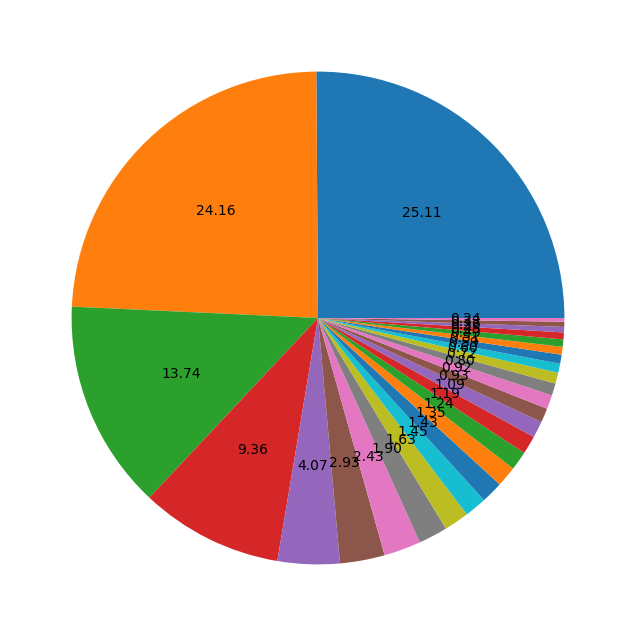

In [39]:
plt.figure(figsize=(8,8))
plt.pie(train["GENRE"].value_counts(),autopct="%0.2f")
plt.show()

In [40]:
import seaborn as sns


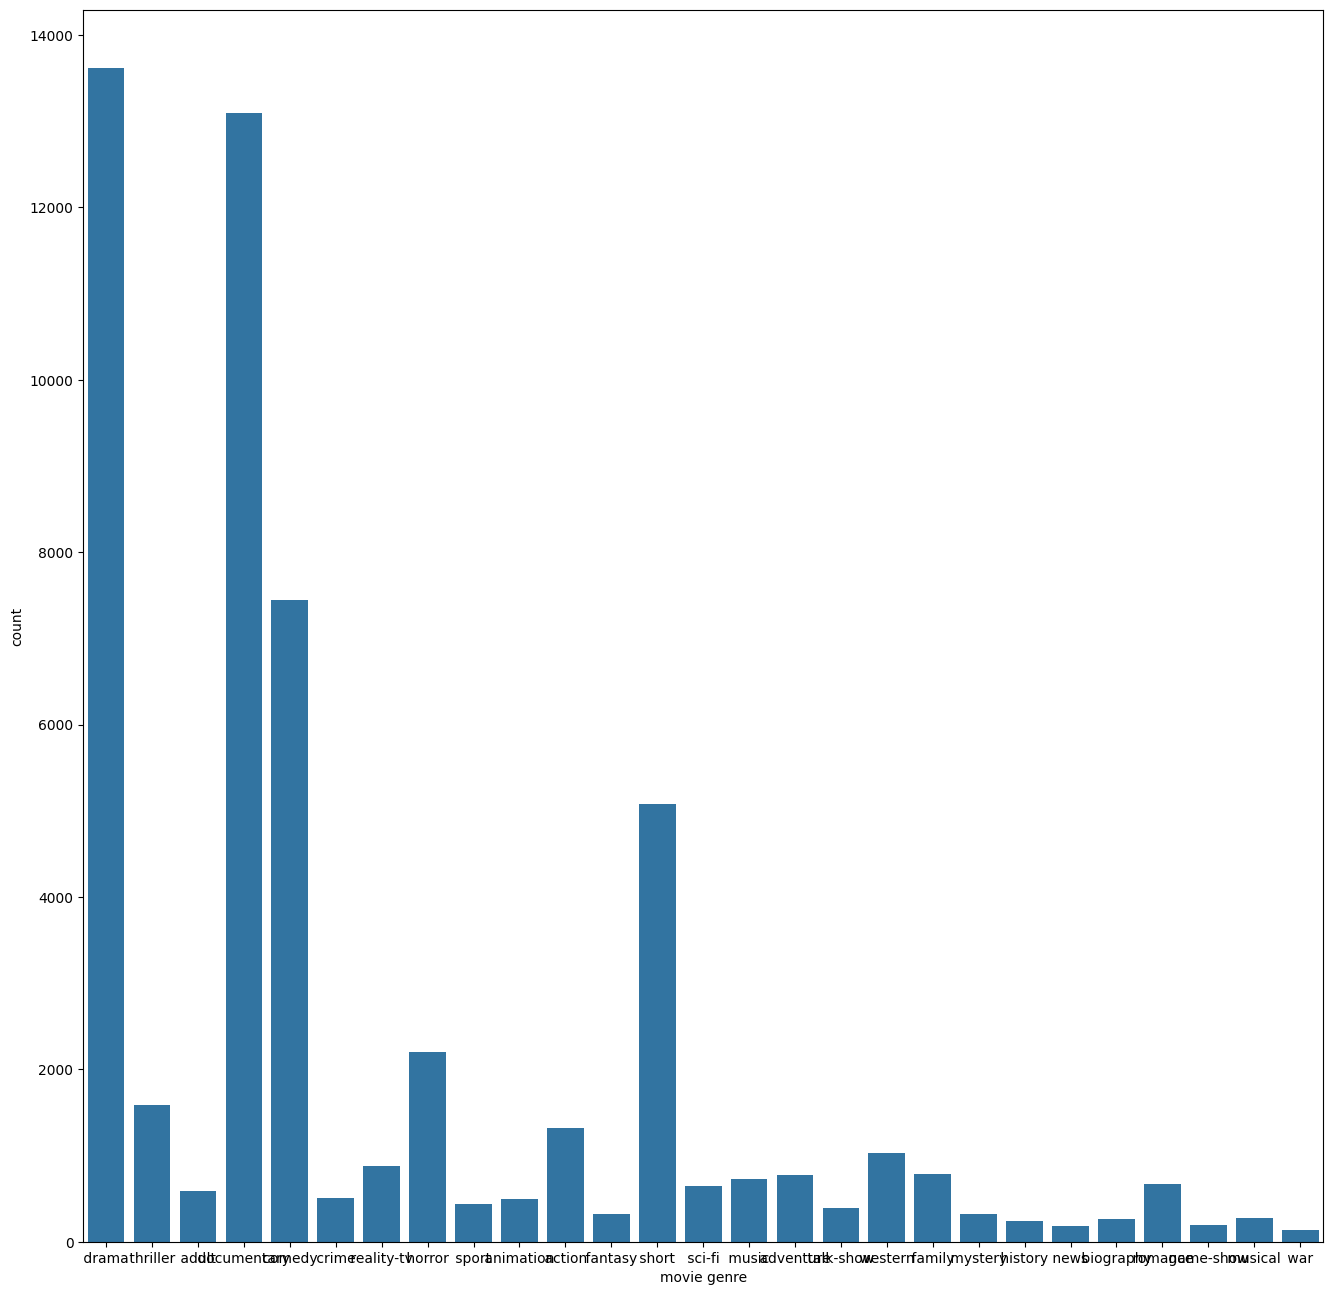

In [41]:
plt.figure(figsize=(16,16))
sns.countplot(x="GENRE",data=train)
plt.xlabel("movie genre")
plt.ylabel("count")
plt.show()

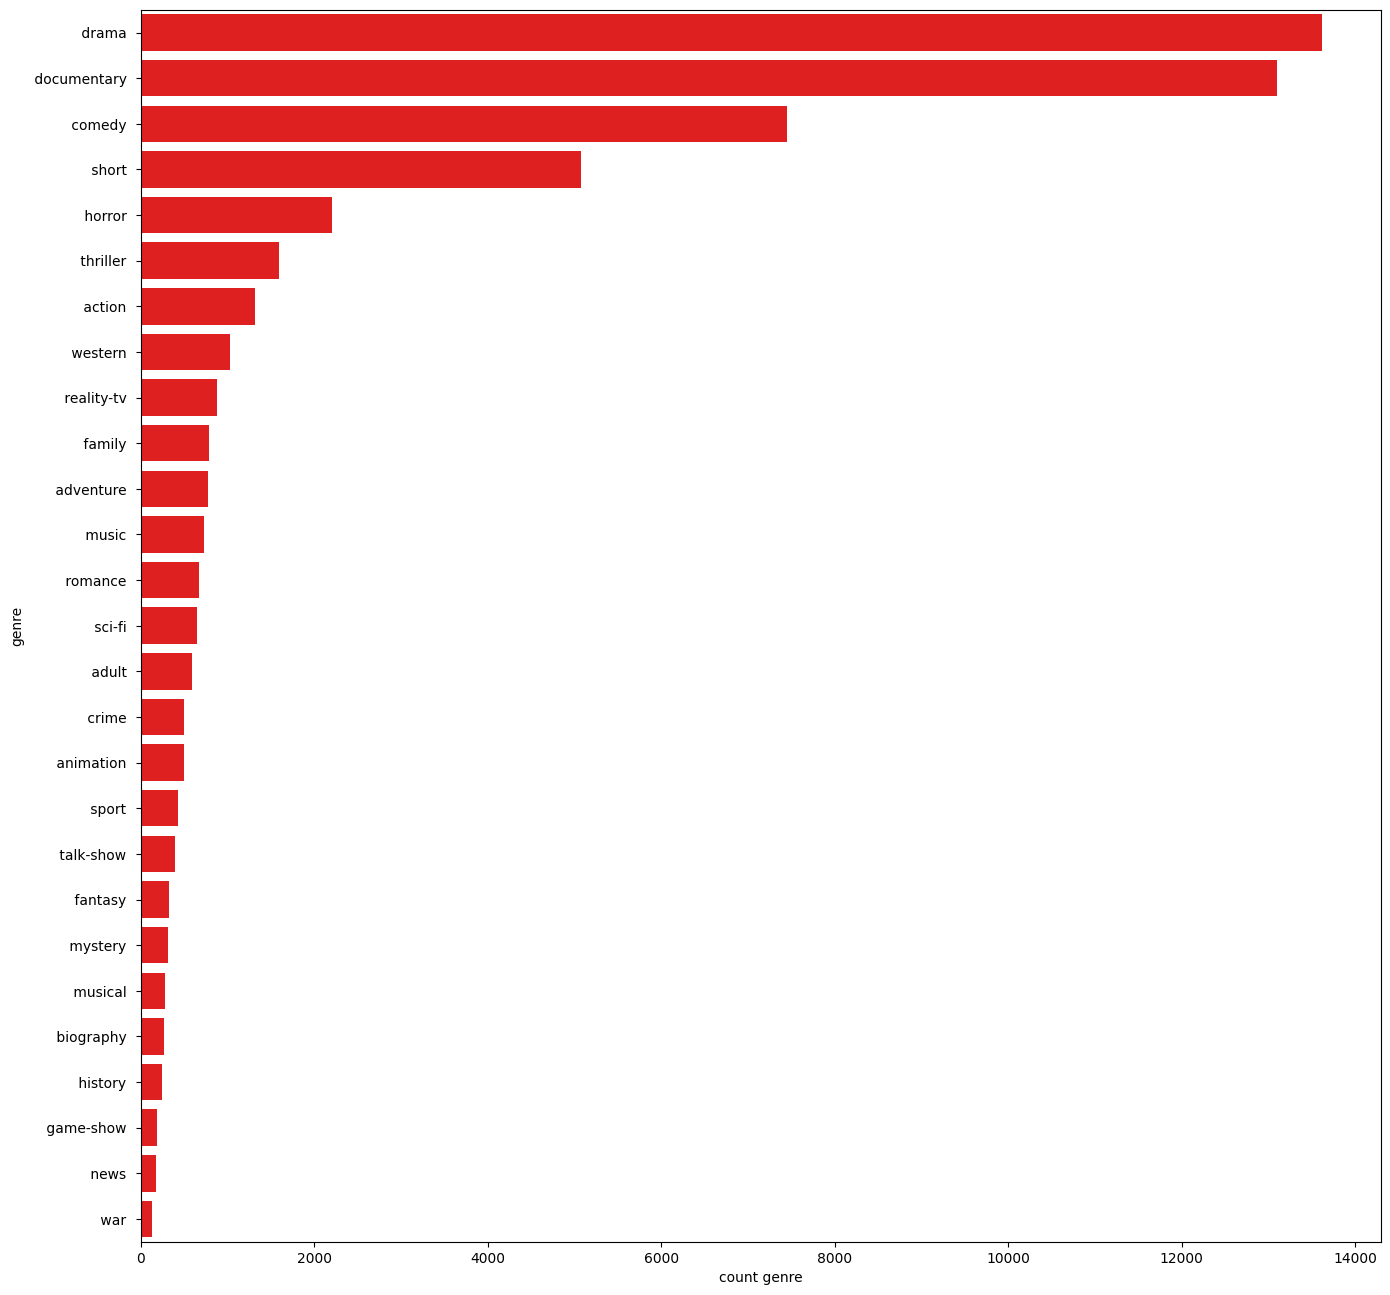

In [42]:
count1=train["GENRE"].value_counts()
plt.figure(figsize=(16,16))
sns.barplot(x=count1,y=count1.index,orient="h",color="r")
plt.xlabel("count genre")
plt.ylabel("genre")
plt.show()

# HANDLING MISSINNG VALUE

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
train['DESCRIPTION'].fillna("", inplace=True)
test['DESCRIPTION'].fillna("", inplace=True)
t_v = TfidfVectorizer(stop_words='english', max_features=10000)
x = t_v.fit_transform(train['DESCRIPTION'])
test = t_v.transform(test['DESCRIPTION'])
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(train['GENRE'])
y_test_solu = label_encoder.transform(test_solution_data['GENRE'])




C:\Users\DELL\AppData\Local\Temp\ipykernel_8056\3983327234.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['DESCRIPTION'].fillna("", inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8056\3983327234.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

# train test split

In [44]:
# split train and test
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)
print("shape of x_train",x_train.shape)
print("shape of x_val",x_val.shape)
print("shape of y_train",y_train.shape)
print("shape of y_val",y_val.shape)

shape of x_train (43371, 10000)
shape of x_val (10843, 10000)
shape of y_train (43371,)
shape of y_val (10843,)


# MODEL BUILDING

In [45]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [46]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200, solver='liblinear', C=1)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
print("accuraccy score",accuracy_score(y_pred,y_val))
print("classification report",classification_report(y_pred,y_val))


accuraccy score 0.5783454763441852
classification report               precision    recall  f1-score   support

           0       0.20      0.53      0.29        99
           1       0.18      0.80      0.29        25
           2       0.10      0.39      0.16        36
           3       0.07      0.70      0.12        10
           4       0.00      0.00      0.00         0
           5       0.58      0.53      0.55      1577
           6       0.01      0.33      0.02         3
           7       0.87      0.65      0.74      3564
           8       0.81      0.53      0.64      4115
           9       0.06      0.50      0.11        18
          10       0.00      0.00      0.00         1
          11       0.40      0.94      0.56        17
          12       0.00      0.00      0.00         0
          13       0.56      0.68      0.61       357
          14       0.38      0.69      0.49        80
          15       0.00      0.00      0.00         0
          16       0.00 

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
# multinomial naivy bays 
from sklearn.naive_bayes import MultinomialNB
mlnb=MultinomialNB()
mlnb.fit(x_train,y_train)
y_pred=mlnb.predict(x_val)
print("accuraccy score",accuracy_score(y_pred,y_val))
print("classification report",classification_report(y_pred,y_val))

accuraccy score 0.5172000368901596


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


classification report               precision    recall  f1-score   support

           0       0.03      0.67      0.06        12
           1       0.04      0.80      0.07         5
           2       0.06      0.57      0.10        14
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.43      0.51      0.47      1210
           6       0.00      0.00      0.00         0
           7       0.89      0.57      0.70      4136
           8       0.84      0.45      0.59      5039
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.05      1.00      0.10         2
          12       0.00      0.00      0.00         0
          13       0.29      0.77      0.42       164
          14       0.03      1.00      0.07         5
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
     

In [48]:
#from sklearn.svm import SVC
#svc=SVC()
#svc.fit(x_train,y_train)
#y_pred=svc.predict(x_val)
#print("accuraccy score",accuracy_score(y_pred,y_val))
#print("classification report",classification_report(y_pred,y_val))

# predicted on test data

In [59]:
x_test_predict=lr.predict(test)
x_test_predict

array([8, 8, 7, ..., 5, 8, 7])

# model evaluation of compare y_test_soltution and predicted output

In [65]:
accuracy = accuracy_score(y_test_solu, x_test_predict)
print(f'Accuracy: {accuracy:.2%}')
print("classification report",classification_report(y_test_solu,x_test_predict))

Accuracy: 57.79%
classification report               precision    recall  f1-score   support

           0       0.54      0.23      0.32      1314
           1       0.62      0.18      0.28       590
           2       0.69      0.15      0.24       775
           3       0.61      0.03      0.05       498
           4       0.00      0.00      0.00       264
           5       0.53      0.57      0.55      7446
           6       0.53      0.02      0.03       505
           7       0.65      0.87      0.74     13096
           8       0.53      0.79      0.63     13612
           9       0.59      0.06      0.10       783
          10       0.80      0.01      0.02       322
          11       0.93      0.46      0.62       193
          12       0.00      0.00      0.00       243
          13       0.67      0.55      0.60      2204
          14       0.72      0.36      0.48       731
          15       0.67      0.01      0.01       276
          16       0.50      0.00      0.0

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

# predicted definition

In [53]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = lr.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

# sample prediction

In [54]:
sample_des1 = "A movie where police chases the criminal and shoots him."
print(predict_movie(sample_des1))

sample_descr_2 = "A movie where a person chases a girl to get married with her but the girl refuses him."
print(predict_movie(sample_descr_2))

 drama 
 drama 


# save model using joblib

In [63]:
import joblib

# Model ko save karna
joblib.dump(lr, 'model.joblib')


['model.joblib']

In [64]:
# load model
import joblib
loaded_model = joblib.load('model.joblib')

# Prediction ke liye use karo
predictions = loaded_model.predict(test)
print(predictions[:5])


[8 8 7 8 8]
